Question 01

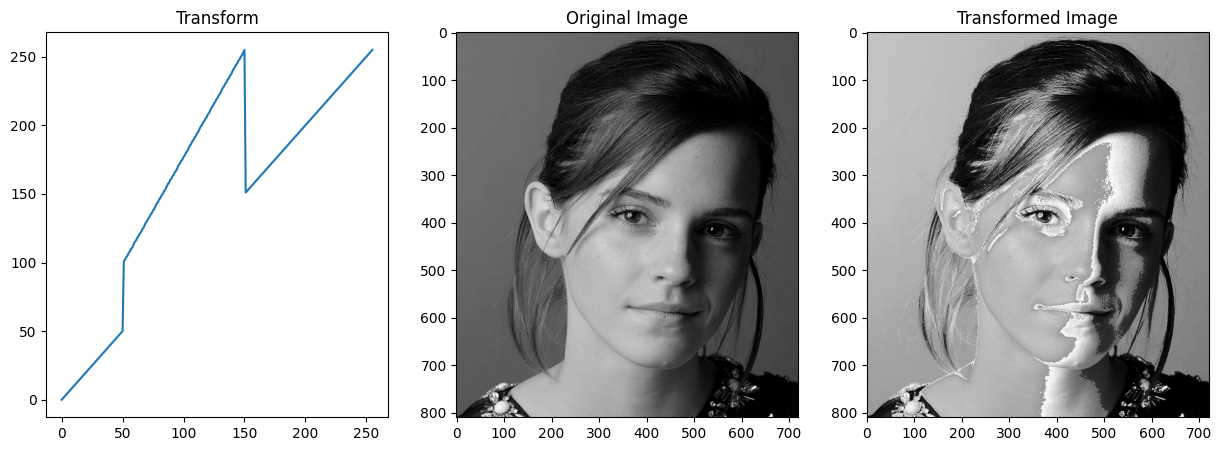

In [22]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50, 50), (50, 100), (150, 255), (150, 150), (255, 255)])

t1 = np.linspace(0          , c[0, 1], c[0, 0] + 1 - 0).astype(np.uint8)
t2 = np.linspace(c[0, 1] + 1, c[1, 1], c[1, 0] - c[0, 0]).astype(np.uint8)
t3 = np.linspace(c[1, 1] + 1, c[2, 1], c[2, 0] - c[1, 0]).astype(np.uint8)
t4 = np.linspace(c[2, 1] + 1, c[3, 1], c[3, 0] - c[2, 0]).astype(np.uint8)
t5 = np.linspace(c[3, 1] + 1, 255    , 255 - c[3, 0]).astype(np.uint8)

transform = np.concatenate((t1, t2), axis=0).astype(np.uint8)
transform = np.concatenate((transform, t3), axis=0).astype(np.uint8)
transform = np.concatenate((transform, t4), axis=0).astype(np.uint8)
transform = np.concatenate((transform, t5), axis=0).astype(np.uint8)

original_image = cv.imread('images/emma.jpg', cv.IMREAD_GRAYSCALE)
transformed_image = cv.LUT(original_image, transform)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(transform)
ax[0].set_title('Transform')
ax[1].imshow(original_image, cmap='gray')
ax[1].set_title('Original Image')
ax[2].imshow(transformed_image, cmap='gray')
ax[2].set_title('Transformed Image')
plt.show()


Question 02

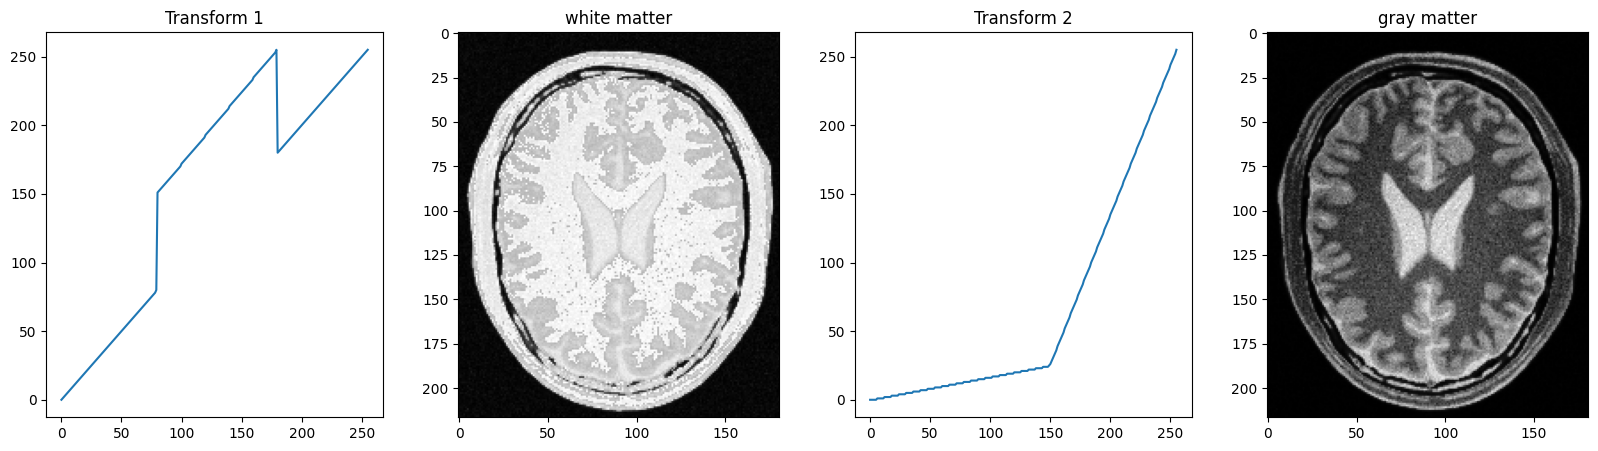

In [23]:
image = cv.imread('images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)  
assert image is not None

t1 = np.linspace(0,80,80)
t2 = np.linspace(81,150,0)
t3 = np.linspace(151,255,100)
t4 = np.linspace(180,255,76)
transform1 = np.concatenate((t1,t2,t3,t4), axis=0).astype(np.uint8)

t1 = np.linspace(0,25,150)
t2 = np.linspace(26,255,106)
transform2 = np.concatenate((t1,t2), axis=0).astype(np.uint8)

transformed_image1 = cv.LUT(image, transform1)
transformed_image2 = cv.LUT(image, transform2)

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].plot(transform1)
ax[0].set_title('Transform 1')
ax[1].imshow(transformed_image1, cmap='gray')
ax[1].set_title('white matter')
ax[2].plot(transform2)
ax[2].set_title('Transform 2')
ax[3].imshow(transformed_image2, cmap='gray')
ax[3].set_title('gray matter')
plt.show()



Question 03

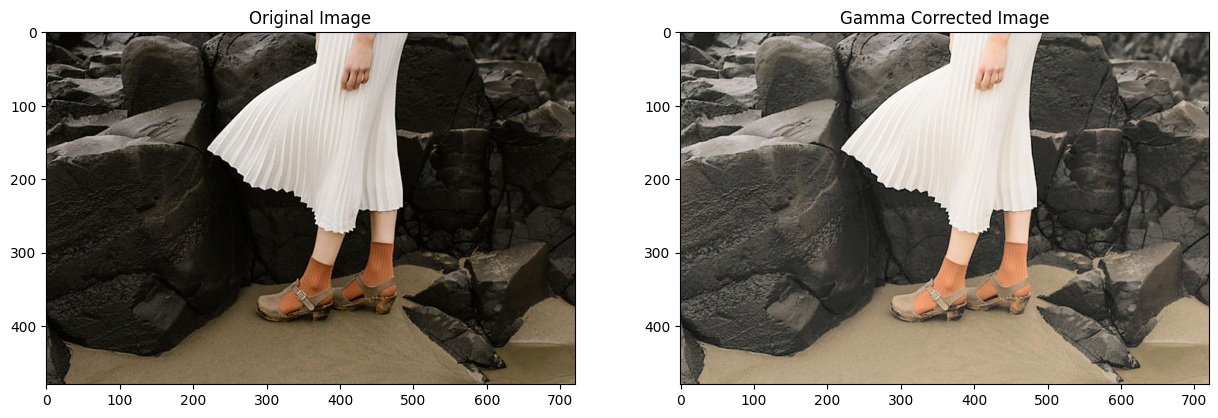

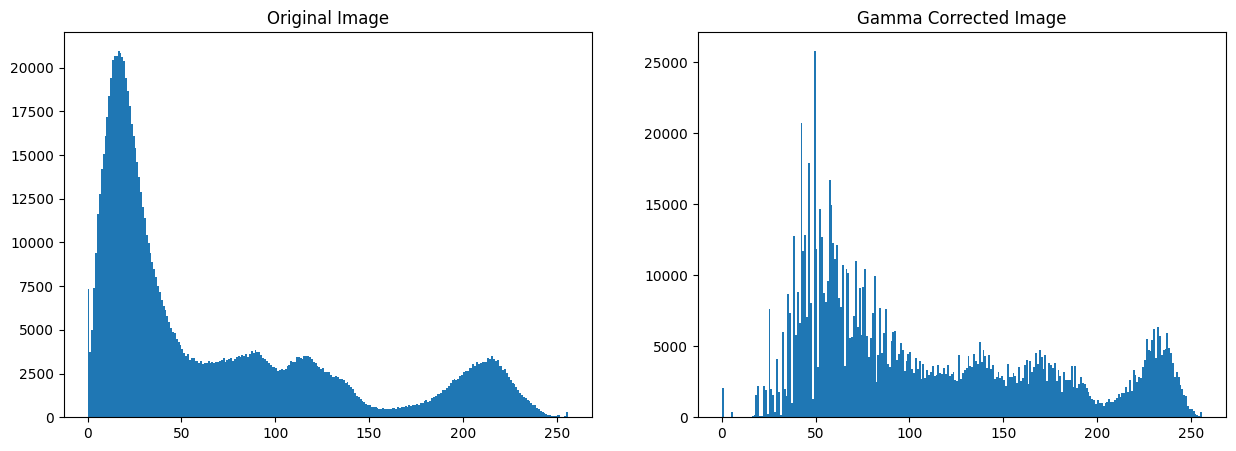

In [24]:
image = cv.imread('images/highlights_and_shadows.jpg')
assert image is not None
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

lab_image = cv.cvtColor(image, cv.COLOR_RGB2LAB)
L, a, b = cv.split(lab_image)

gamma = 0.5
transform = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0, 256)]).astype(np.uint8)

L = cv.LUT(L, transform)

lab_image = cv.merge((L, a, b))
new_image = cv.cvtColor(lab_image, cv.COLOR_LAB2RGB)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(new_image)
ax[1].set_title('Gamma Corrected Image')
plt.show()

# Histograms of the original and gamma corrected images
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(image.ravel(), 256, [0, 256])
ax[0].set_title('Original Image')
ax[1].hist(new_image.ravel(), 256, [0, 256])
ax[1].set_title('Gamma Corrected Image')
plt.show()


Question 04

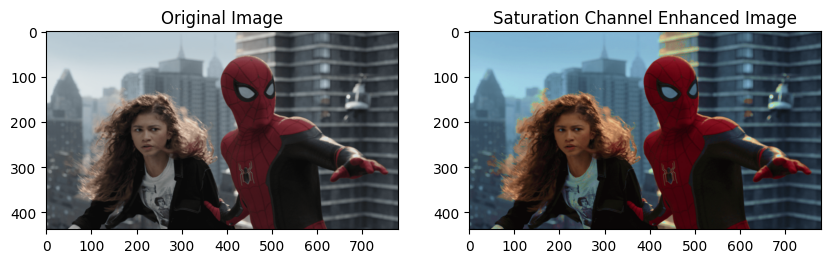

In [25]:
image = cv.imread('images/spider.png')
assert image is not None

hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv_image)

a = 0.5
sigma = 70
s_new = np.minimum(s + a*128*np.exp(-((s - 128) ** 2)/(2*(sigma**2))), 255).astype(np.uint8)

hsv_image = cv.merge((h, s_new, v))

new_image = cv.cvtColor(hsv_image, cv.COLOR_HSV2RGB)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(new_image)
ax[1].set_title('Saturation Channel Enhanced Image')
plt.show()


Question 05

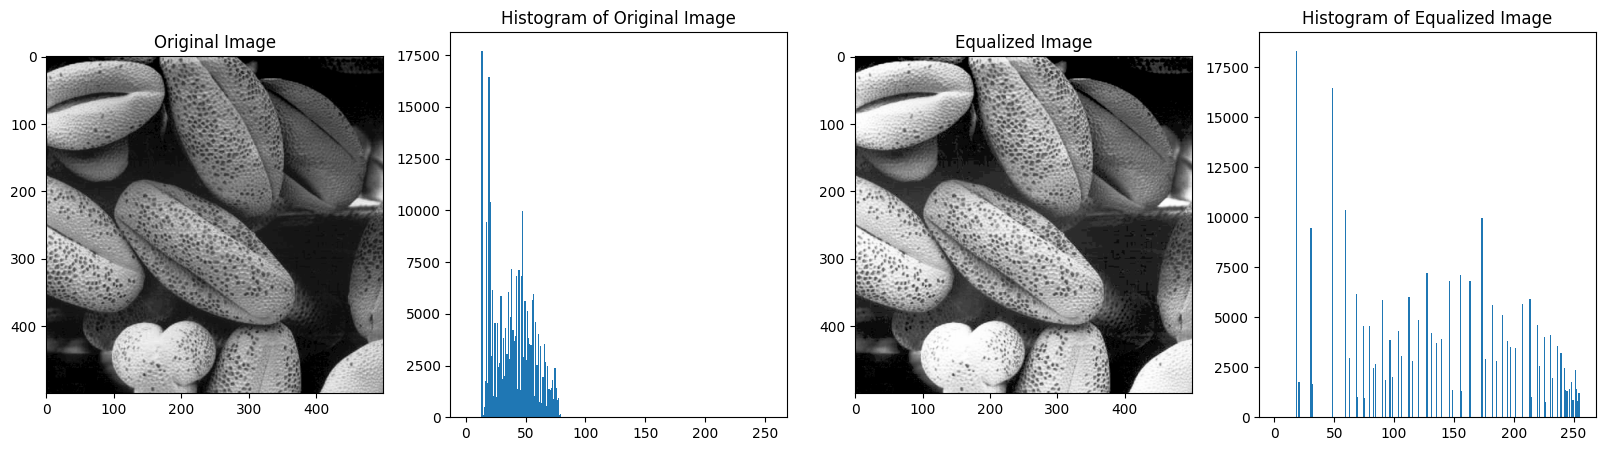

In [26]:
image = cv.imread('images/shells.tif',cv.IMREAD_GRAYSCALE)
assert image is not None

# Using the Hisogram Equalization Equation
height, width = image.shape
histogram = cv.calcHist([image], [0], None, [256], [0, 256])
cdf = np.cumsum(histogram)

L = 256
transform = np.uint8((L-1) * cdf / (height * width))
equalized_image = transform[image]

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].hist(image.ravel(), 256, [0, 256])
ax[1].set_title('Histogram of Original Image')
ax[2].imshow(equalized_image, cmap='gray')
ax[2].set_title('Equalized Image')
ax[3].hist(equalized_image.ravel(), 256, [0, 256])
ax[3].set_title('Histogram of Equalized Image')
plt.show()



Question 06

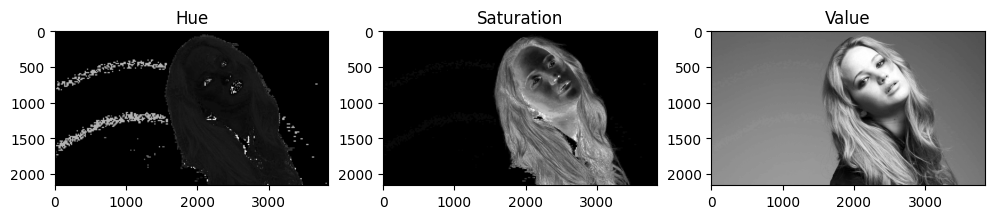

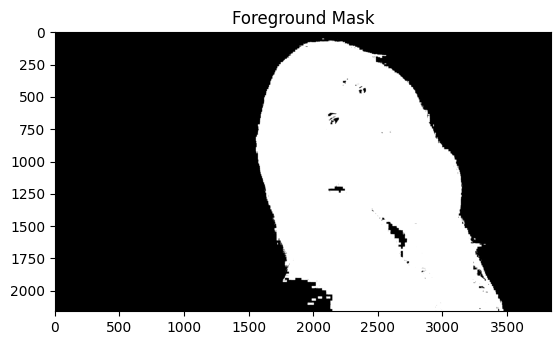

In [27]:
img = cv.imread('images/jeniffer.jpg')
assert img is not None

hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
hue, saturation, value = cv.split(hsv_img)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1), plt.imshow(hue, cmap='gray'), plt.title('Hue')
plt.subplot(1, 3, 2), plt.imshow(saturation, cmap='gray'), plt.title('Saturation')
plt.subplot(1, 3, 3), plt.imshow(value, cmap='gray'), plt.title('Value')
plt.show()

_ ,mask = cv.threshold(saturation, 15, 255, cv.THRESH_BINARY)

# Display the mask (foreground extraction)
plt.imshow(mask, cmap='gray'), plt.title('Foreground Mask')
plt.show()


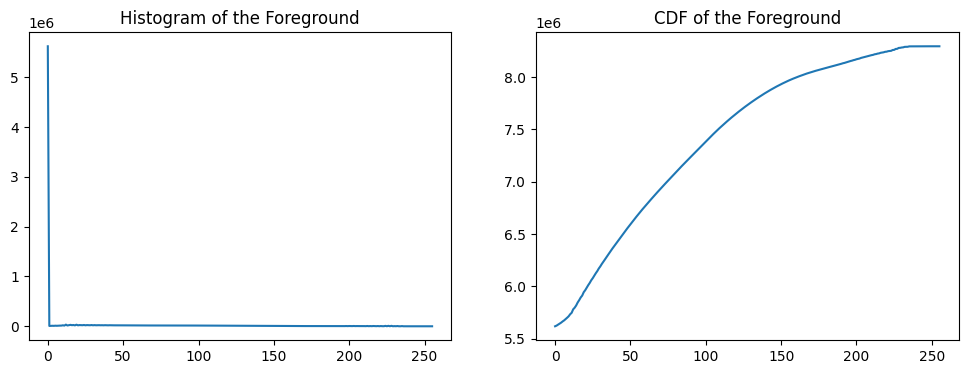

In [28]:
foreground = cv.bitwise_and(img, img, mask=mask)
hist = cv.calcHist([foreground], [0], None, [256], [0, 256])

#CDF of the histogram
cdf = hist.cumsum()

# Display the histogram of the foreground and the CDF
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1), plt.plot(hist), plt.title('Histogram of the Foreground')
plt.subplot(1, 2, 2), plt.plot(cdf), plt.title('CDF of the Foreground')
plt.show()

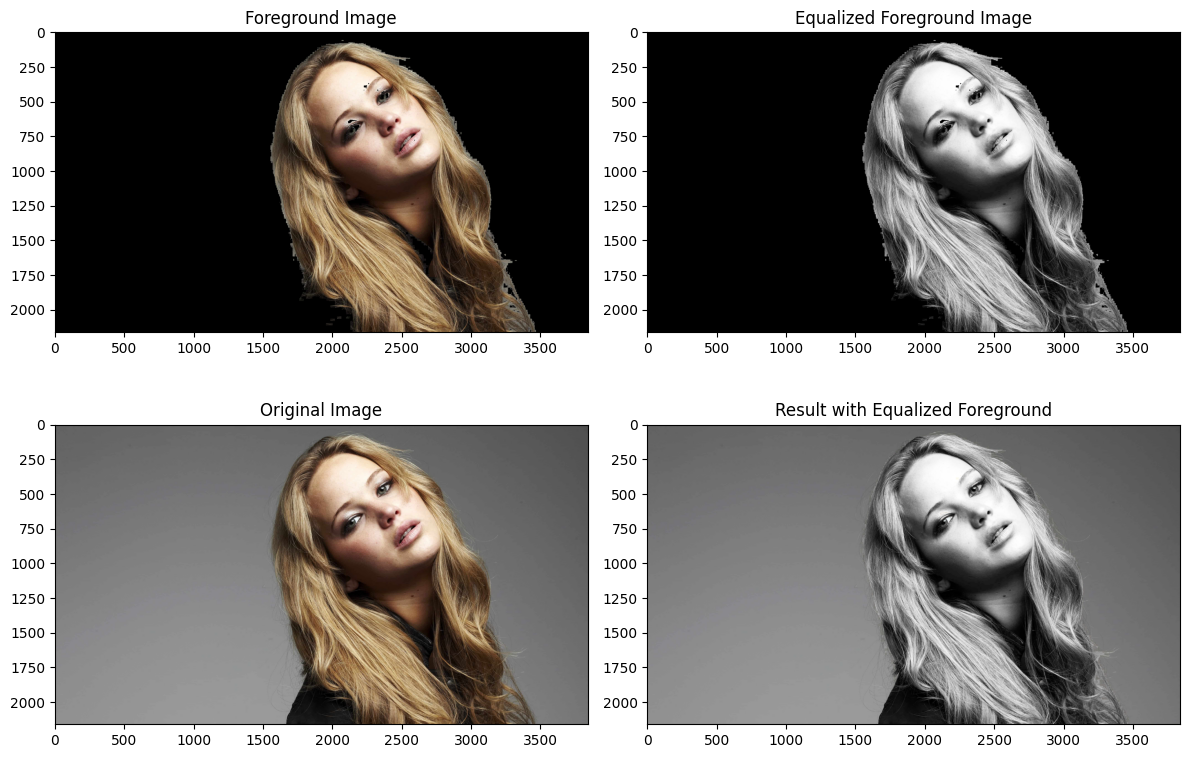

In [29]:
# Histogram equalization for the foreground
equalized_foreground = cv.equalizeHist(cv.cvtColor(foreground, cv.COLOR_BGR2GRAY)).astype(np.uint8)
equalized_foreground = cv.cvtColor(equalized_foreground, cv.COLOR_GRAY2BGR)

# Extract the background
background = cv.bitwise_and(img, img, mask=cv.bitwise_not(mask))

final_img = cv.add(equalized_foreground, background)

#Plotting the images

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
ax[0, 0].set_title('Foreground Image')
ax[0, 1].imshow(cv.cvtColor(equalized_foreground, cv.COLOR_BGR2RGB))
ax[0, 1].set_title('Equalized Foreground Image')
ax[1, 0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[1, 0].set_title('Original Image')
ax[1, 1].imshow(cv.cvtColor(final_img, cv.COLOR_BGR2RGB))
ax[1, 1].set_title('Result with Equalized Foreground')

plt.tight_layout()
plt.show()